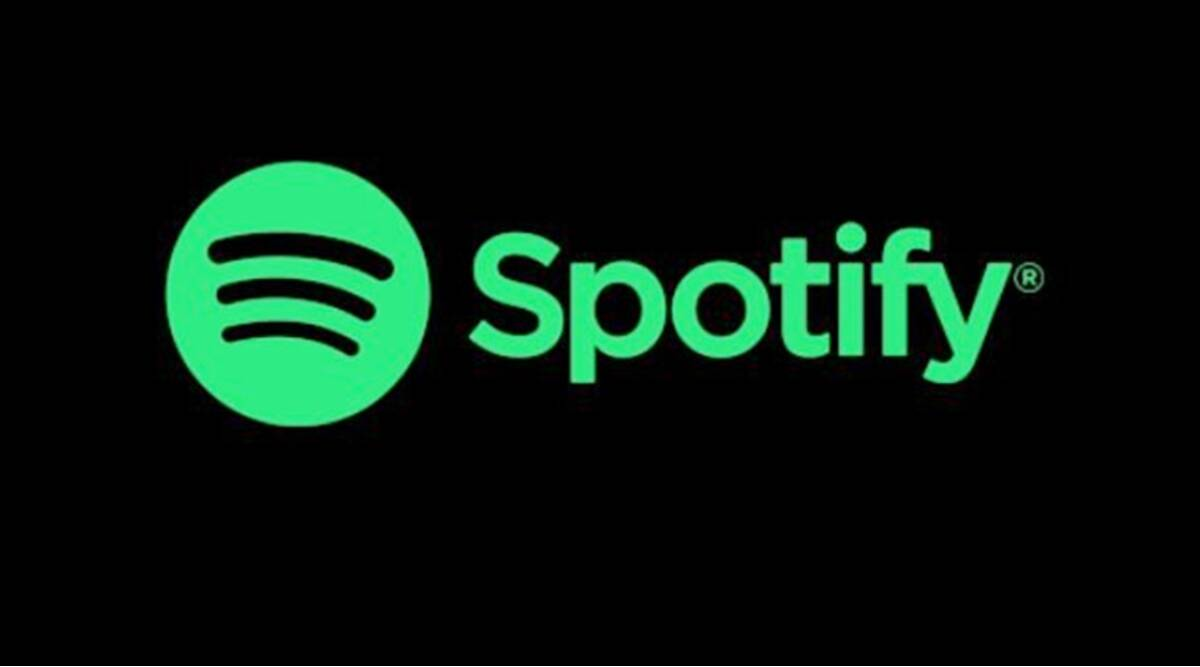

This is part 1 of a 2 part Data Science project in which I will be developing a Content-based Recommendation System (CBRS) for Spotify.

In this notebook, I have performed data transformation operations to convert the existing Spotify dataset into a more usable form for modelling. The transformed dataset will be used to develop the content-based recommendation system for Spotify.

# Data

# Data Description



This Spotify dataset was collected by Yamac Eren Ay using the Spotify Web API. This amazing dataset is available on Kaggle, check it out here.

The latest version of the dataset consists of the following files:

    artists.csv: Details of 1.1M artists on Spotify.
    data_by_artist_o.csv: Audio features for each artist.
    data_by_genres_o.csv: Audio features for each genre.
    data_by_year_o.csv: Audio features of songs in different year.
    data_o.csv: Original data containing audio features of tracks.
    tracks.csv: Audio features of 600k tracks available on Spotify.

Some of the audio features that describe songs/tracks are:

    Acousticness: Whether the song/track is acoustic or not.
    Tempo: The tempo of the song/track, measured in beats per minute (BPM).
    Energy: How energetic the song/track is.
    Liveness: Whether a live audience is present or the song/track is studio recorded.
    Valence: How positive the the music is.



# Data Preprocessing & Transformation

In [1]:
# To read and handle data files
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For handling arrays and vectors
import numpy as np

# For string manipulation
import string

# For displaying progress
from tqdm.auto import tqdm
tqdm.pandas()

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocess & Transform Artists Data

In [2]:
# Read data file and display first 5 records
artists = pd.read_csv('artists.csv')
artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [3]:
# Display final 5 records in artists DataFrame
artists.tail()

,id,followers,genres,name,popularity
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,['black comedy'],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,['black comedy'],Donnell Rawlings,15
1162094,2bP2cNhNBdKXHC6AnqgyVp,40.0,['new comedy'],Gabe Kea,8


Let's first take alook at a sample record from artists data. The artists data records the artist ID, name of the artist, music genres of the artist, number of followers on Spotify and the popularity of the artist.

In [4]:
# Sample record from artists data
pd.DataFrame(artists.iloc[142254][list(artists.columns)]).transpose()

,id,followers,genres,name,popularity
142254,0nmQIMXWTXfhgOBdNzhGOs,4606565.0,"['alternative metal', 'nu metal']",Avenged Sevenfold,78




The "genre" column in artists data lists the genre of each artist. For better modelling, I have removed all punctuations from the genre field and converted it to lowercase.

The preprocessing operations for artists data are performed using the function defined below.


In [5]:
# Function to preprocess and transform artists data
def transform_artists(df):
    print('Transforming artists DataFrame...')

    # Remove punctuations from "genre" field for each record
    print('\nRemoving punctuations from "genre" field...')
    df['genres'] = df.progress_apply(lambda x: x['genres'].lower().translate(str.maketrans('', '', string.punctuation)), axis=1)
    
    # Reorder columns
    df_transformed = df.reindex(columns=['id', 'name', 'genres', 'followers', 'popularity'])

    # Return preprocessed DataFrame
    print("\nartists DataFrame transformed successfully!\n")
    return df_transformed

In [6]:
# Preprocess and transform artists DataFrame and display first 5 records
artists_transformed = transform_artists(artists)
artists_transformed.head()

Transforming artists DataFrame...

Removing punctuations from "genre" field...


  0%|          | 0/1162095 [00:00<?, ?it/s]


artists DataFrame transformed successfully!



,id,name,genres,followers,popularity
0,0DheY5irMjBUeLybbCUEZ2,Armid & Amir Zare Pashai feat. Sara Rouzbehani,,0.0,0
1,0DlhY15l3wsrnlfGio2bjU,ปูนา ภาวิณี,,5.0,0
2,0DmRESX2JknGPQyO15yxg7,Sadaa,,0.0,0
3,0DmhnbHjm1qw6NCYPeZNgJ,Tra'gruda,,0.0,0
4,0Dn11fWM7vHQ3rinvWEl4E,Ioannis Panoutsopoulos,,2.0,0


In [7]:
# Display final 5 records in artists DataFrame
artists_transformed.tail()

,id,name,genres,followers,popularity
1162090,3cOzi726Iav1toV2LRVEjp,Ali Siddiq,black comedy,4831.0,34
1162091,6LogY6VMM3jgAE6fPzXeMl,Rodney Laney,,46.0,2
1162092,19boQkDEIay9GaVAWkUhTa,Blake Wexler,,257.0,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,Donnell Rawlings,black comedy,2357.0,15
1162094,2bP2cNhNBdKXHC6AnqgyVp,Gabe Kea,new comedy,40.0,8


In [8]:
# Sample record from transformed artists data
pd.DataFrame(artists_transformed.iloc[142254][list(artists_transformed.columns)]).transpose()

,id,name,genres,followers,popularity
142254,0nmQIMXWTXfhgOBdNzhGOs,Avenged Sevenfold,alternative metal nu metal,4606565.0,78


Finally, the artists data has been processed to a usable form in which the "genre" field contains only words describing the artists' music genres. This data will be used to transform the tracks data to include the music genres for each song/track based on the artists that created the song/track.

In [9]:
artists.to_csv('artists_transformed.csv', index=None)

# Preprocess & Transform Tracks Data

In [10]:
# Read data file and display first 5 records
tracks = pd.read_csv('tracks.csv')
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [11]:
# Display final 5 records in tracks DataFrame
tracks.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


Let's take a look at a sample record from the tracks data. Each record includes the ID of the song/track, name, artists' names, artists's IDs, release date, along with many other features that describe the particular song/track.

In [12]:
# Sample record from tracks data
pd.DataFrame(tracks.iloc[175912][list(tracks.columns)]).transpose()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
175912,3jaJeSphs7bS5Gt3i5LJL3,Anastasia,55,367280,0,"['Slash', 'Myles Kennedy', 'The Conspirators']","['4Cqia9vrAbm7ANXbJGXsTE', '2YZOQlBE1v44RxPEAV...",2012-05-11,0.449,0.936,1,-5.447,1,0.0445,0.000595,0.00213,0.118,0.437,100.487,4




Similar to the preprocessing functions applied to the artists data, preprocessing and transformation operations are applied to the tracks data.

Punctuations as well as the word "feat" is removed from the artists column for each record.

Further, records in the "id_artists" column are converted into a list of individual artists IDs. This will be used to add information about artist genres to the tracks data, using the artists data.

The "release_date" column is used to determine the release year of each song/track. A new column "release_year" is created and the "release_date" column is dropped.

Values in the "loudness" column range from -60.0 to 5.38. To have only positive values in this column, I have added 60.0 to each record in this column.

A new column "duration_s" is created using the "duration_ms" column, which is then dropped.

The tracks data does not include information about the music genres of each song/track. This information will be essential for the development of the recommendation system. Hence, I have added a new column "genre" which includes the music genres for each song/track based on the genres of the contributing artists, taken from the artists data.

The columns "explicit" and "time_signature" are also dropped as they are not required.


In [13]:
# Function to preprocess/transform tracks data
def transform_tracks(df):
    print('Transforming tracks DataFrame...')

    # Remove unwanted characters from "artists" field for each record
    print('\nRemoving unwanted characters from "artists" field...')
    df['artists'] = df.progress_apply(lambda x: x['artists'][1:-1].translate(str.maketrans('', '', "\'")), axis=1)

    # Remove "feat" from "artists" field for each record (unwanted)
    print('\nRemoving word "feat" from "artists" field...')
    df['artists'] = df.progress_apply(lambda x: x['artists'].replace('feat', ''), axis=1)

    # Remove unwanted characters from "id_artists" fied for each record and split to form a list of artist IDs
    print('\nTransforming "id_artists" field into list of artist IDs...')
    df['id_artists'] = df.progress_apply(lambda x: x['id_artists'][1:-1].split(','), axis=1)

    # Remove punctuations from artist IDs for each record
    print('\nRemoving punctuations from "id_artists" field...')
    df['id_artists'] = df.progress_apply(lambda x: [x['id_artists'][i].translate(str.maketrans('', '', string.punctuation)).strip() for i in range(len(x['id_artists']))], axis=1)

    # Create new column "release_year" to store year of release of song/track
    print('\nCreating new field "release_year"...')
    df['release_year'] = df.progress_apply(lambda x: x['release_date'][0:4], axis=1)

    # Transform "loudness" to have positive values
    print('\nTransforming "loudness" field to have only positive values...')
    df['loudness'] = df.progress_apply(lambda x: x['loudness']+60.0, axis=1)

    # Convert duration from milliseconds to seconds
    print('\nCreating "duration_s" field using "duration_ms" field...')
    df['duration_s'] = df.progress_apply(lambda x: x['duration_ms']*0.001, axis=1)

    # Create "genres" column using artists data
    print('\nCreating "genres" field using artists data...')
    df['genres'] = df.progress_apply(lambda x: str(artists.loc[artists['id'].isin(x['id_artists'])]['genres'].tolist()).translate(str.maketrans('', '', string.punctuation)), axis=1)

    # Drop "release_date", "duration_ms", "explicit" and "time_signature" columns
    df.drop(['release_date', 'duration_ms', 'explicit', 'time_signature'], axis=1, inplace=True)

    # Reorder columns
    df_transformed = df.reindex(columns=['id', 'name', 'artists', 'id_artists', 'genres', 'release_year', 'duration_s',
                                         'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

    # Return preprocessed DataFrame
    print("\ntracks DataFrame transformed successfully!\n")
    return df_transformed

In [14]:
# Preprocess and transform tracks DataFrame and display first 5 records
tracks_transformed = transform_tracks(tracks)
tracks_transformed.head()

Transforming tracks DataFrame...

Removing unwanted characters from "artists" field...


  0%|          | 0/586672 [00:00<?, ?it/s]


Removing word "feat" from "artists" field...


  0%|          | 0/586672 [00:00<?, ?it/s]


Transforming "id_artists" field into list of artist IDs...


  0%|          | 0/586672 [00:00<?, ?it/s]


Removing punctuations from "id_artists" field...


  0%|          | 0/586672 [00:00<?, ?it/s]


Creating new field "release_year"...


  0%|          | 0/586672 [00:00<?, ?it/s]


Transforming "loudness" field to have only positive values...


  0%|          | 0/586672 [00:00<?, ?it/s]


Creating "duration_s" field using "duration_ms" field...


  0%|          | 0/586672 [00:00<?, ?it/s]


Creating "genres" field using artists data...


  0%|          | 0/586672 [00:00<?, ?it/s]


tracks DataFrame transformed successfully!



,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,[45tIt06XoI0Iio4LBEVpls],,1922,126.903,6,0.645,0.4450,0,46.662,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,[14jtPCOoNZwquk5wd9DxrY],,1922,98.200,0,0.695,0.2630,0,37.864,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,[5LiOoJbxVSAMkBS2fUm3X2],tango vintage tango,1922,181.640,0,0.434,0.1770,1,38.820,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,[5LiOoJbxVSAMkBS2fUm3X2],tango vintage tango,1922,176.907,0,0.321,0.0946,7,32.039,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,[3BiJGZsyX9sJchTqcSA7Su],adult standards big band easy listening lounge...,1922,163.080,0,0.402,0.1580,3,43.100,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [15]:
# Display final 5 records in tracks DataFrame
tracks_transformed.tail()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
586667,5rgu12WBIHQtvej2MdHSH0,云与海,阿YueYue,[1QLBXKM5GCpyQQSVMNZqrZ],chinese viral pop,2020,258.267,50,0.560,0.518,0,52.529,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896
586668,0NuWgxEp51CutD2pJoF4OM,blind,ROLE MODEL,[1dy5WNgIKQU6ezkpZs4y8z],alt z alternative rb bedroom pop indie cafe po...,2020,153.293,72,0.765,0.663,0,54.777,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,FINNEAS,[37M5pPGs6V1fchFJSgCguX],alt z electropop indie pop la indie pop postte...,2020,187.601,70,0.535,0.314,7,47.177,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"Gentle Bones, Clara Benin","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",chill rb indie cafe pop singaporean pop opm pi...,2021,142.003,58,0.696,0.615,10,53.788,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,Afrosound,[0i4Qda0k4nf7jnNHmSNpYv],chicha cumbia nucumbia,2015,214.360,38,0.686,0.723,6,52.933,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204


In [16]:
# Sample record from transformed tracks data
pd.DataFrame(tracks_transformed.iloc[175912][list(tracks_transformed.columns)]).transpose()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
175912,3jaJeSphs7bS5Gt3i5LJL3,Anastasia,"Slash, Myles Kennedy, The Conspirators","[4Cqia9vrAbm7ANXbJGXsTE, 2YZOQlBE1v44RxPEAVSdV...",modern hard rock hard rock rock,2012,367.28,55,0.449,0.936,1,54.553,1,0.0445,0.000595,0.00213,0.118,0.437,100.487


Finally, the tracks data is also transformed into a more usable form, containing the music genres for each song/track. This data can now be used to develop the content-based recommendation system for Spotify.

In [17]:
tracks_transformed.to_csv('tracks_transformed.csv', index=None)